In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
prompts_v2 = pd.read_csv("translations_scores/system_bielik_translations_prompt_templates_basic_metric.csv")
prompts_few = pd.read_csv("translations_scores/system_bielik_translations_prompt_few_shot_basic_metric.csv")

In [3]:
prompts_v2 = pd.concat([prompts_v2, prompts_few], axis=1)

In [4]:
prompts_v2

,bleu_bielik_prompt0_translation,chrf_bielik_prompt0_translation,comet_bielik_prompt0_translation,bertscore_bielik_prompt0_translation,bleu_bielik_prompt1_translation,chrf_bielik_prompt1_translation,comet_bielik_prompt1_translation,bertscore_bielik_prompt1_translation,bleu_bielik_prompt2_translation,chrf_bielik_prompt2_translation,...,comet_bielik_prompt5_translation,bertscore_bielik_prompt5_translation,bleu_bielik_prompt6_translation,chrf_bielik_prompt6_translation,comet_bielik_prompt6_translation,bertscore_bielik_prompt6_translation,bleu_bielik_prompt7_translation,chrf_bielik_prompt7_translation,comet_bielik_prompt7_translation,bertscore_bielik_prompt7_translation
0,0.014805,0.310668,0.654256,0.67702,0.012821,0.28523,0.636459,0.654695,0.112928,0.446748,...,0.639702,0.667452,0.121245,0.440715,0.819788,0.827166,0.106348,0.435794,0.819099,0.823898


In [9]:
values = prompts_v2.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.015 & 0.311 & 0.654 & 0.677 \\
 & 0.013 & 0.285 & 0.636 & 0.655 \\
 & 0.113 & 0.447 & 0.824 & 0.828 \\
 & 0.091 & 0.439 & 0.819 & 0.802 \\
 & 0.111 & 0.440 & 0.822 & 0.824 \\
 & 0.014 & 0.296 & 0.640 & 0.667 \\
 & 0.121 & 0.441 & 0.820 & 0.827 \\
 & 0.106 & 0.436 & 0.819 & 0.824 \\


C:\Users\kajet\AppData\Local\Temp\ipykernel_26616\4223537042.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


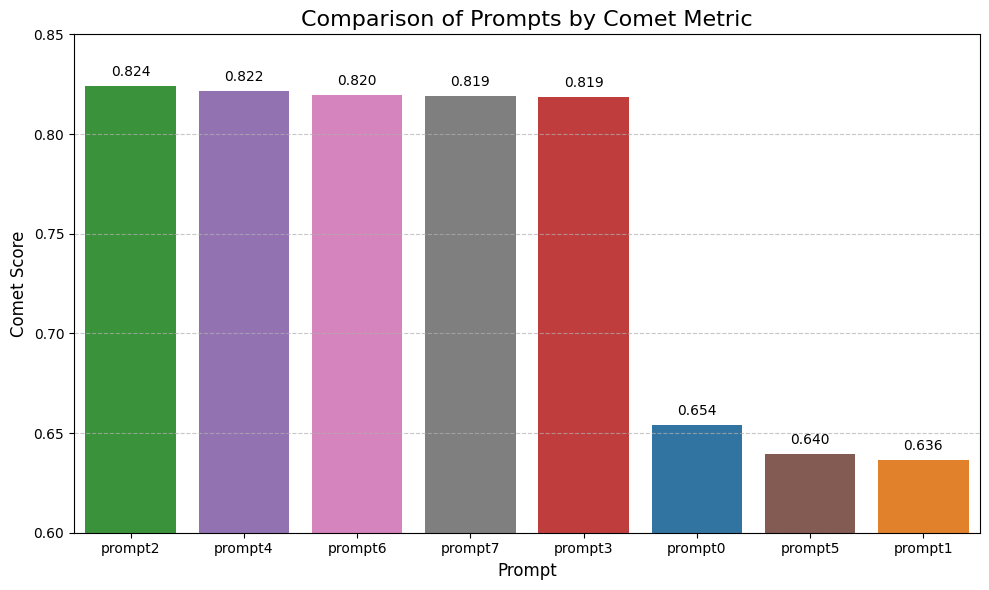

C:\Users\kajet\AppData\Local\Temp\ipykernel_26616\4223537042.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


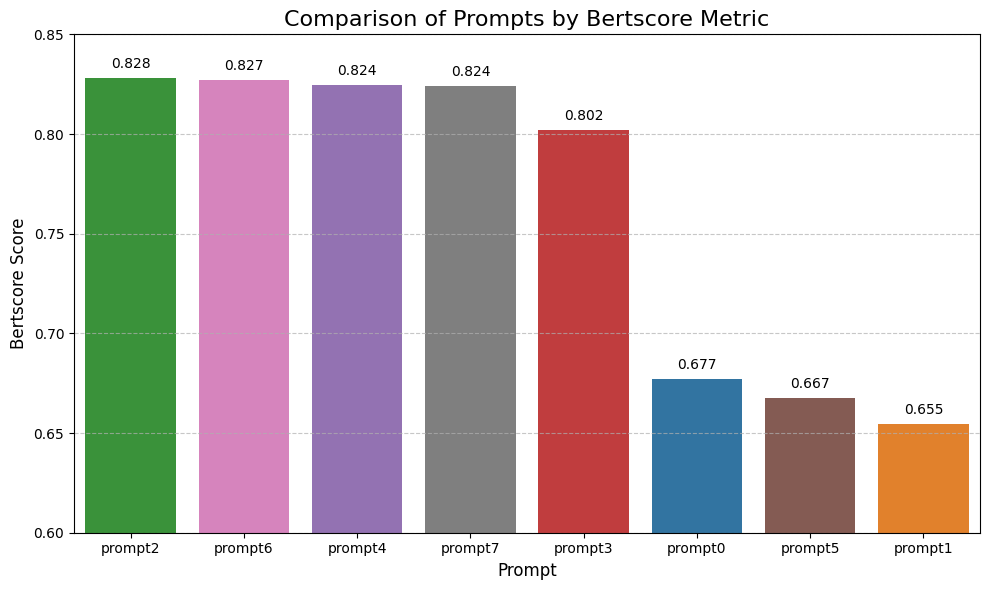

C:\Users\kajet\AppData\Local\Temp\ipykernel_26616\4223537042.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


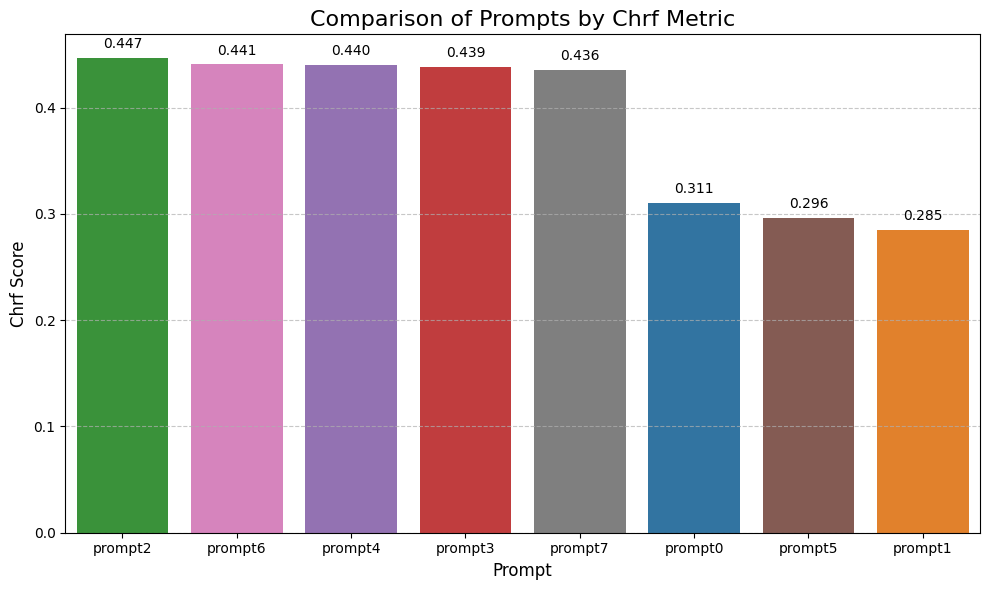

In [15]:
metrics = ["comet", "bertscore", "chrf"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in prompts_v2.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = parts[2]
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in prompts_v2.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = parts[2]
        score = prompts_v2[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    if metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()